In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

In [2]:
#ladybug.png
from matplotlib.image import imread
image = imread(r'img\ladybug.png')
image.shape

(533, 800, 3)

In [3]:
image

array([[[0.09803922, 0.11372549, 0.00784314],
        [0.09411765, 0.10980392, 0.00392157],
        [0.09411765, 0.11372549, 0.        ],
        ...,
        [0.22352941, 0.4117647 , 0.08235294],
        [0.21960784, 0.40392157, 0.08627451],
        [0.20392157, 0.3882353 , 0.07450981]],

       [[0.09411765, 0.10980392, 0.00392157],
        [0.09019608, 0.10588235, 0.        ],
        [0.09019608, 0.10588235, 0.        ],
        ...,
        [0.23529412, 0.42352942, 0.08627451],
        [0.23137255, 0.41568628, 0.09803922],
        [0.21568628, 0.4       , 0.08627451]],

       [[0.09019608, 0.10588235, 0.00784314],
        [0.08627451, 0.10196079, 0.00392157],
        [0.08627451, 0.10196079, 0.        ],
        ...,
        [0.25882354, 0.44705883, 0.10980392],
        [0.24705882, 0.43529412, 0.10588235],
        [0.22745098, 0.4117647 , 0.09411765]],

       ...,

       [[0.05490196, 0.07058824, 0.00392157],
        [0.05490196, 0.07058824, 0.00392157],
        [0.05098039, 0

In [4]:
X = image.reshape(-1, 3)
X.shape

(426400, 3)

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)

In [6]:
kmeans.cluster_centers_

array([[0.98326355, 0.9351094 , 0.02573261],
       [0.02240384, 0.11051449, 0.00579273],
       [0.21762744, 0.38532948, 0.0572455 ],
       [0.7599995 , 0.20910062, 0.04433527],
       [0.09915568, 0.25297862, 0.01673489],
       [0.6116277 , 0.6297308 , 0.38689855],
       [0.37087163, 0.52249783, 0.156312  ],
       [0.8831067 , 0.72412664, 0.03478576]], dtype=float32)

In [7]:
kmeans.cluster_centers_.shape

(8, 3)

In [8]:
kmeans.labels_

array([1, 1, 1, ..., 4, 1, 1])

In [9]:
kmeans.labels_.shape

(426400,)

In [10]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img

array([[0.02240384, 0.11051449, 0.00579273],
       [0.02240384, 0.11051449, 0.00579273],
       [0.02240384, 0.11051449, 0.00579273],
       ...,
       [0.09915568, 0.25297862, 0.01673489],
       [0.02240384, 0.11051449, 0.00579273],
       [0.02240384, 0.11051449, 0.00579273]], dtype=float32)

In [11]:
segmented_img = segmented_img.reshape(533, 800, 3)

In [12]:
segmented_imgs = []
n_colors = range(10, 1, -2)

for n_cluster in n_colors:
    kmeans = KMeans(n_clusters=n_cluster, random_state=42, n_jobs=-1).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

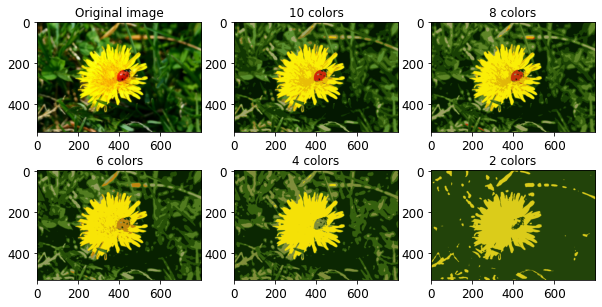

In [13]:
plt.figure(figsize=(10, 5))
plt.subplot(231)
plt.imshow(image)
plt.title('Original image')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title('{} colors'.format(n_clusters))

In [14]:
segmented_imgs = []
n_colors = range(10, 2, -1)

for n_cluster in n_colors:
    kmeans = KMeans(n_clusters=n_cluster, random_state=42, n_jobs=-1).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

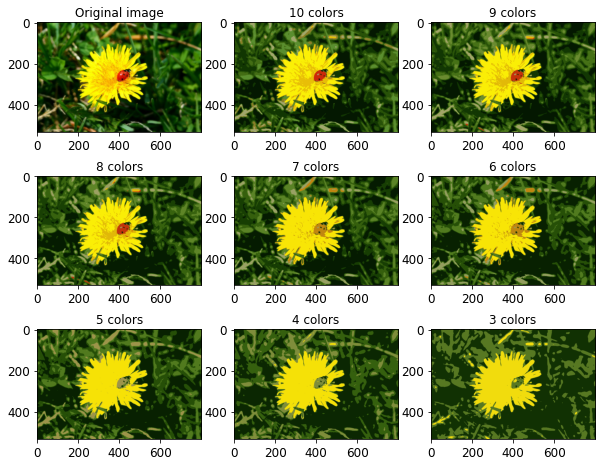

In [15]:
plt.figure(figsize=(10, 8))
plt.subplot(331)
plt.imshow(image)
plt.title('Original image')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(332 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title('{} colors'.format(n_clusters))

### 半监督学习
首先，让我们将训练集聚类为50个集群， 然后对于每个聚类，让我们找到最靠近质心的图像。 我们将这些图像称为代表性图像：

In [16]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# 读取并划分训练集、测试集
X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits,
                                                    y_digits,
                                                    random_state=42)

D:\Programing\Anaconda3\envs\ml_env\lib\site-packages\sklearn\feature_extraction\text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, defaultdict


In [17]:
y_train

array([5, 2, 0, ..., 2, 7, 1])

In [18]:
y_train.shape

(1347,)

In [19]:
X_train

array([[ 0.,  0.,  2., ...,  0.,  0.,  0.],
       [ 0.,  5., 16., ...,  6.,  1.,  0.],
       [ 0.,  0.,  4., ...,  2.,  0.,  0.],
       ...,
       [ 0.,  0.,  9., ..., 16.,  2.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  1.,  0.,  0.]])

In [20]:
X_train.shape

(1347, 64)

In [21]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
lrm = LogisticRegression(random_state=42)
# 只用前50个样本做训练模型，用来预测
lrm.fit(X_train[:n_labeled], y_train[:n_labeled])
lrm.score(X_test, y_test)

0.8266666666666667

In [22]:
# 以最近质心的样本作用代表，选50个
k = 50
kmeans = KMeans(n_clusters=k, random_state=42, n_jobs=-1)
X_digits_dist = kmeans.fit_transform(X_train)

In [23]:
X_digits_dist

array([[41.52526381, 47.80543271, 53.28606227, ..., 40.84863485,
        33.42329319, 45.35671763],
       [51.57028789, 55.26223803, 42.55626876, ..., 43.60992152,
        53.69754997, 62.09003954],
       [17.68832797, 53.78479191, 46.78038512, ..., 41.03618053,
        43.17301972, 49.18269733],
       ...,
       [46.20281892, 46.98687906, 39.79532121, ..., 35.41242071,
        50.51847709, 54.14682717],
       [42.16801694, 38.66939823, 45.43803427, ..., 33.62986935,
        30.22067077, 42.76745683],
       [50.33500015, 44.86428246, 50.47025399, ..., 32.67650267,
        43.21772438, 51.93318172]])

In [24]:
X_digits_dist.shape

(1347, 50)

In [25]:
representative_digits_idx = np.argmin(X_digits_dist, axis=0)
representative_digits_idx

array([1022, 1312,  535,  817,  704,   74,  175,  407,  753,  589,  841,
        194,  702,  737,  598,  481,   50,  937,  114,  159, 1056,  891,
        577, 1005,  731,  256, 1311,  205,   73, 1267, 1290,  325, 1343,
        357,   26,  559,  159,  137, 1057, 1194, 1235,  648,  525,  715,
        795,  771,  498, 1050,  855,  151], dtype=int64)

In [26]:
representative_digits_idx.shape

(50,)

In [27]:
# 找到离50个质心距离最近的50个样本
X_representative_digits = X_train[representative_digits_idx]
X_representative_digits

array([[ 0.,  0.,  7., ...,  3.,  0.,  0.],
       [ 0.,  0.,  0., ..., 15.,  4.,  0.],
       [ 0.,  0.,  6., ..., 11.,  1.,  0.],
       ...,
       [ 0.,  0.,  3., ...,  2.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  6.,  0.,  0.]])

In [28]:
X_representative_digits.shape

(50, 64)

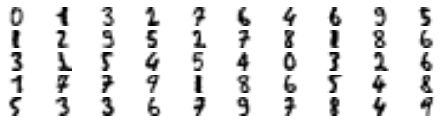

In [29]:
# 绘制代表样本
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8),
               cmap='binary',
               interpolation='bilinear')
    plt.axis('off')

In [30]:
# 手动标记样本的结果分类
y_representative_digits = np.array([
    0, 1, 3, 2, 7, 6, 4, 6, 9, 5, 1, 2, 9, 5, 2, 7, 8, 8, 8, 6, 3, 1, 5, 4, 5,
    4, 0, 3, 2, 6, 1, 7, 7, 9, 1, 8, 6, 5, 4, 8, 5, 3, 3, 6, 7, 9, 7, 8, 4, 9
])

现在我们有一个只有50个标记实例的数据集，它们中的每一个都是其集群的代表性图像，而不是完全随机的实例。 让我们看看性能是否更好：

In [31]:
# 以监督学习法完成分类
lrm = LogisticRegression(random_state=42)
lrm.fit(X_representative_digits, y_representative_digits)
lrm.score(X_test, y_test)

0.9244444444444444

但也许我们可以更进一步：如果我们将标签传播到同一群集中的所有其他实例，该怎么办？

In [32]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
log_reg.score(X_test, y_test)

0.9311111111111111

只选择前20个来试试

In [55]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]  #选择属于当前簇的所有样本
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)  #排序找到前20个
    above_cutoff = (X_cluster_dist > cutoff_distance)  # False True结果
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [57]:
X_cluster_dist

array([-1., -1., -1., ..., -1., -1., -1.])

In [48]:
X_cluster_dist.shape

(1347,)

In [58]:
kmeans.labels_

array([13, 14, 26, ..., 39,  4, 10])

In [59]:
kmeans.labels_.shape

(1347,)

In [60]:
in_cluster

array([False, False, False, ..., False, False, False])

In [61]:
cluster_dist

array([20.38301077, 15.61850557, 14.93503811, 13.01343463, 14.76271372,
       30.67854316, 19.48142581, 17.9835565 , 28.7667508 , 17.56825542,
       16.31841467, 14.26006595, 14.8025061 , 24.51643048, 22.05999997,
       20.75620556, 21.72006551])

In [64]:
cluster_dist.shape

(17,)

In [62]:
cutoff_distance

14.829012502118697

In [63]:
above_cutoff

array([False, False, False, ..., False, False, False])

In [66]:
X_cluster_dist[in_cluster & above_cutoff]

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [65]:
partially_propagated

array([False, False, False, ..., False, False, False])

In [42]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [43]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
log_reg.score(X_test, y_test)

0.9022222222222223

### DBSCAN

In [67]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

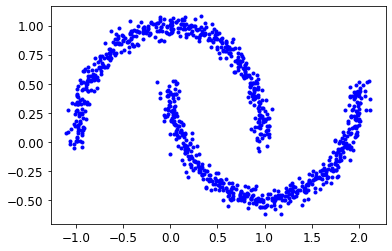

In [68]:
plt.plot(X[:, 0], X[:, 1], 'b.')

In [69]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [70]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5], dtype=int64)

In [71]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13], dtype=int64)

In [72]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [73]:
dbscan2 = DBSCAN(eps=0.2, min_samples=5)
dbscan2.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [74]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0],
                cores[:, 1],
                c=dbscan.labels_[core_mask],
                marker='o',
                s=size,
                cmap="Paired")
    plt.scatter(cores[:, 0],
                cores[:, 1],
                marker='*',
                s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0],
                non_cores[:, 1],
                c=dbscan.labels_[non_core_mask],
                marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom='off')
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft='off')
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps,
                                                  dbscan.min_samples),
              fontsize=14)

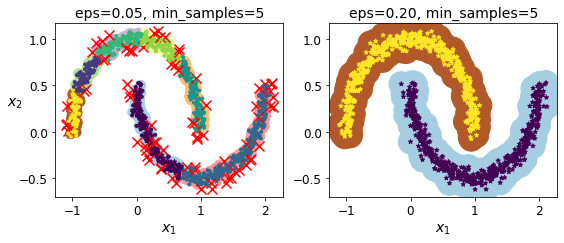

In [75]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()